# Temperature Forecast Project using ML

Problem Statement:
Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

#for plotting and EDA
import seaborn as sns
import matplotlib.pyplot as plt

#for spliting dataset into train and test
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

#for model building
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#for model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import MinMaxScaler,power_transform,LabelEncoder,OrdinalEncoder,StandardScaler
from sklearn.decomposition import PCA

from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
#there is column called date, so we are using parse date for that column
tf = pd.read_csv(r'D:\DT EVAL Projects\temperature.csv',parse_dates= ['Date'])
tf.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [3]:
#checking shape
tf.shape

(7752, 25)

we have 7752 rows and 25 columnn including 2 target columns.

In [4]:
#checking columns
tf.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Please note that there are two target variables here:

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day minimum temperature

In [5]:
#checking datatypes
tf.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

We can see that all the columns are float datatype , date column is date datetype

# Checking Null values

In [6]:
#lets check for null values
tf.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

we can see that most of the columns are having null values.

# Statistical Summary

In [7]:
#checking statistical summary
tf.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


LDAPS_RHmax,LDAPS_Tmin_lapse, Solar radiation, LDAPS_WS, LDAPS_LH, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM and Slope have skewness becuase their mean and std have too much difference.

LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 have too many outlier because their 75% and max value have too much difference.

# Checking Correlation

In [8]:
#lets check for correlation among all the columns
tf.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.113211,0.132419,-0.067122,-0.168010,0.069561,0.105422,0.005320,-0.134226,0.006956,...,-0.008369,-0.012671,-0.010580,-0.237610,-0.118763,-0.255970,-0.090113,-0.019011,0.108306,0.128719
Present_Tmax,0.113211,1.000000,0.618760,-0.206782,-0.304209,0.575289,0.629247,-0.122876,0.136716,-0.314863,...,-0.100420,-0.121271,-0.101471,-0.052776,0.009075,-0.187855,-0.106097,-0.025557,0.613109,0.625252
Present_Tmin,0.132419,0.618760,1.000000,0.124921,-0.015334,0.470118,0.772921,-0.035111,-0.009368,0.085593,...,0.069095,-0.046645,-0.064394,-0.078715,-0.043725,-0.251257,-0.146736,0.053828,0.473868,0.799758
LDAPS_RHmin,-0.067122,-0.206782,0.124921,1.000000,0.579141,-0.564580,0.089476,0.294361,-0.070858,0.613818,...,0.390967,0.240642,0.168595,0.087523,-0.076608,0.102612,0.124346,0.244795,-0.442958,0.095830
LDAPS_RHmax,-0.168010,-0.304209,-0.015334,0.579141,1.000000,-0.373404,-0.114143,0.135333,0.238579,0.436652,...,0.229050,0.134607,0.117853,0.196751,0.025792,0.178031,0.220668,0.149699,-0.286478,-0.072490
LDAPS_Tmax_lapse,0.069561,0.575289,0.470118,-0.564580,-0.373404,1.000000,0.654021,-0.311996,0.048010,-0.438439,...,-0.242122,-0.188115,-0.160273,-0.042298,0.091107,-0.179766,-0.163123,0.048111,0.836144,0.591535
LDAPS_Tmin_lapse,0.105422,0.629247,0.772921,0.089476,-0.114143,0.654021,1.000000,-0.130035,-0.134761,0.010901,...,0.000870,-0.088575,-0.094655,-0.096726,-0.026831,-0.196407,-0.186753,0.160443,0.593195,0.886964
LDAPS_WS,0.005320,-0.122876,-0.035111,0.294361,0.135333,-0.311996,-0.130035,1.000000,0.006711,0.289445,...,0.191886,0.161684,0.144085,0.036836,-0.059756,0.191983,0.172464,0.122116,-0.346592,-0.097390
LDAPS_LH,-0.134226,0.136716,-0.009368,-0.070858,0.238579,0.048010,-0.134761,0.006711,1.000000,-0.147296,...,-0.077545,0.016102,0.019979,0.133870,0.025948,0.055402,0.087203,-0.047523,0.159324,-0.055895
LDAPS_CC1,0.006956,-0.314863,0.085593,0.613818,0.436652,-0.438439,0.010901,0.289445,-0.147296,1.000000,...,0.389453,0.168742,0.091722,-0.008170,-0.006876,-0.014159,-0.020853,0.218949,-0.457583,-0.011129


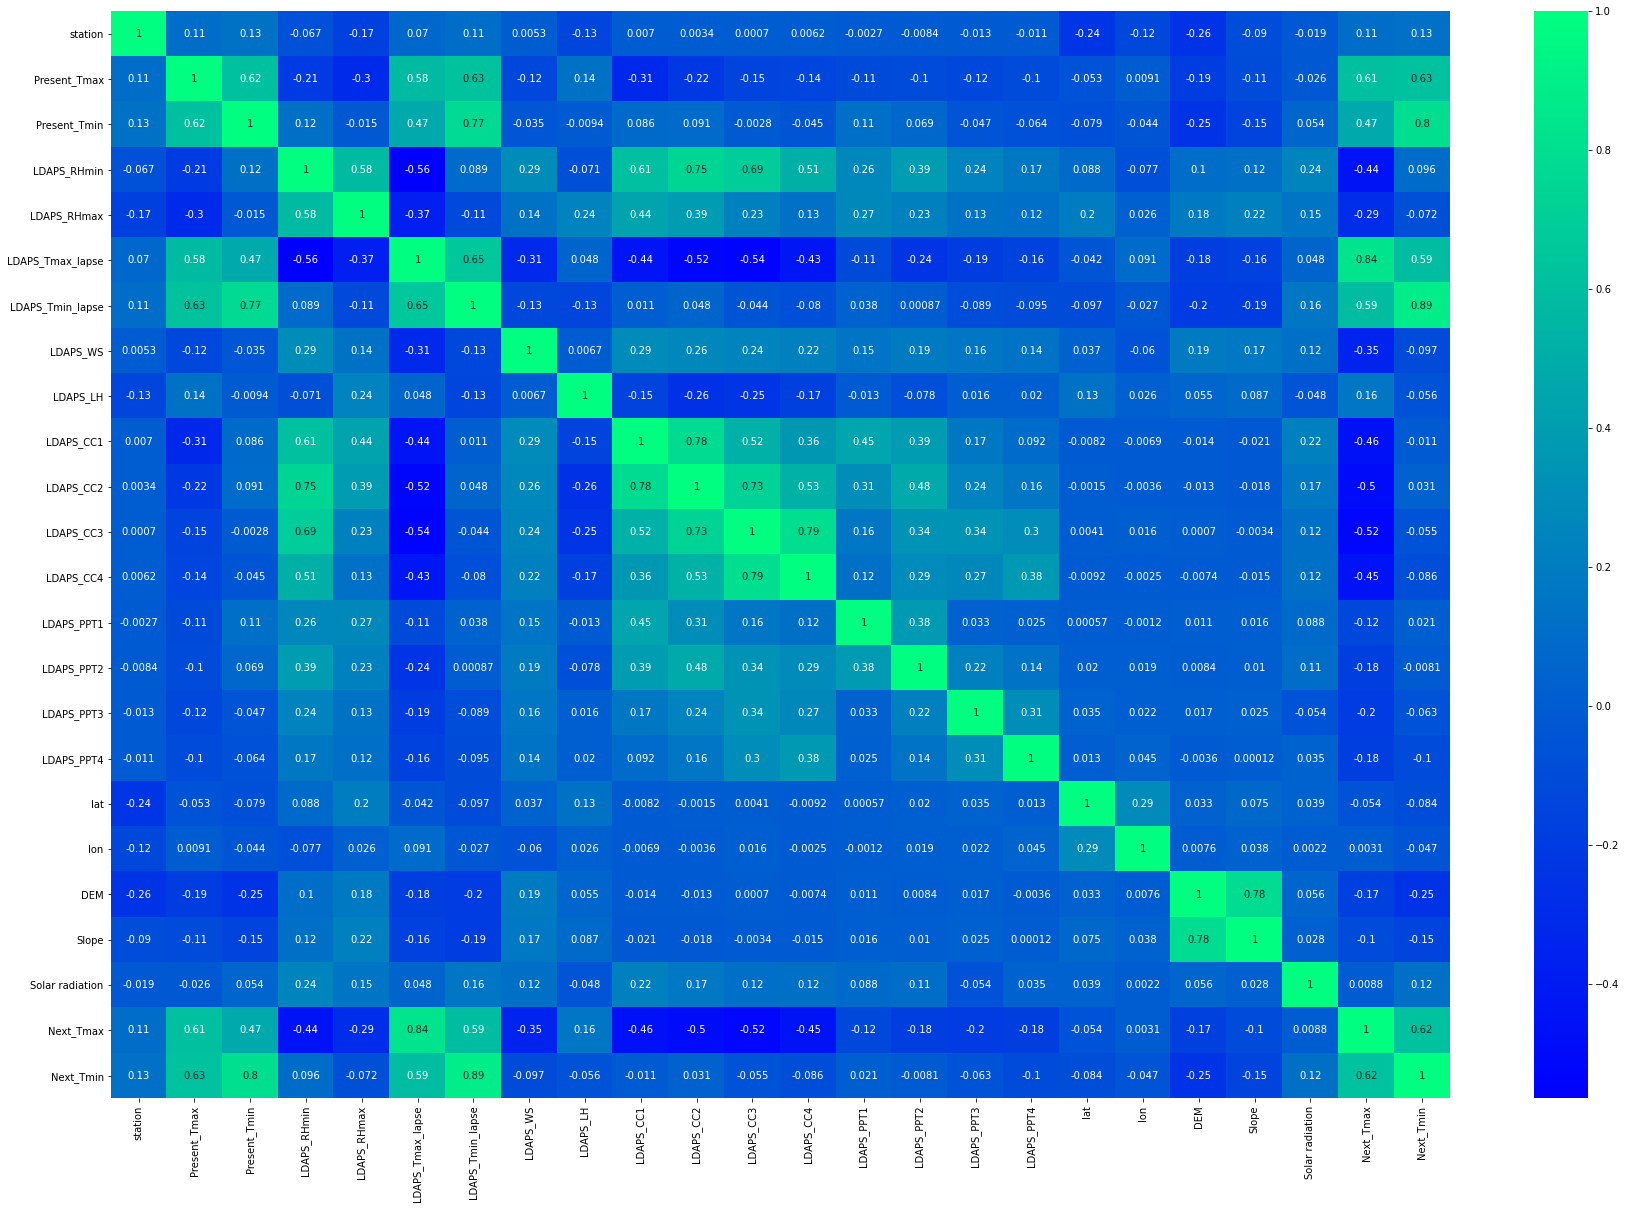

In [9]:
#correlation
fig = plt.figure(figsize=(30,20))
cor_matrix = tf.corr(method='pearson')
sns.heatmap(cor_matrix,annot = True,cmap = 'winter')
plt.show()

In [10]:
#lets check for the correlation of input columns with first Target Variable (TMAX)
cor_matrix['Next_Tmax'].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.836144
Next_Tmin           0.621427
Present_Tmax        0.613109
LDAPS_Tmin_lapse    0.593195
Present_Tmin        0.473868
LDAPS_LH            0.159324
station             0.108306
Solar radiation     0.008809
lon                 0.003060
lat                -0.053567
Slope              -0.102838
LDAPS_PPT1         -0.120079
DEM                -0.172674
LDAPS_PPT2         -0.180449
LDAPS_PPT4         -0.180669
LDAPS_PPT3         -0.196845
LDAPS_RHmax        -0.286478
LDAPS_WS           -0.346592
LDAPS_RHmin        -0.442958
LDAPS_CC4          -0.451324
LDAPS_CC1          -0.457583
LDAPS_CC2          -0.496251
LDAPS_CC3          -0.520706
Name: Next_Tmax, dtype: float64

Next_Tmax is highly positively correlated with LDAPS_Tmax_lapse and highly negatively correlated with LDAPS_CC3.

In [11]:
#lets check for the correlation of input columns with Second Target Variable (TMIN)
cor_matrix['Next_Tmin'].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.886964
Present_Tmin        0.799758
Present_Tmax        0.625252
Next_Tmax           0.621427
LDAPS_Tmax_lapse    0.591535
station             0.128719
Solar radiation     0.120400
LDAPS_RHmin         0.095830
LDAPS_CC2           0.031500
LDAPS_PPT1          0.021486
LDAPS_PPT2         -0.008131
LDAPS_CC1          -0.011129
lon                -0.046737
LDAPS_CC3          -0.055217
LDAPS_LH           -0.055895
LDAPS_PPT3         -0.063318
LDAPS_RHmax        -0.072490
lat                -0.083621
LDAPS_CC4          -0.085805
LDAPS_WS           -0.097390
LDAPS_PPT4         -0.104515
Slope              -0.147043
DEM                -0.247100
Name: Next_Tmin, dtype: float64

Next_Tmin is highly positively correlated with LDAPS_Tmax_lapse.

# Data PreProcessing

**Handling the Null values in the dataset**

In [12]:
tf.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [13]:
#we can see that all the belows column are null for the same rows

tf.loc[tf.LDAPS_RHmin.isnull()]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1025,1.0,2013-10-08,27.1,24.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,126.991,212.3350,2.7850,5304.412598,31.4,22.3
1026,2.0,2013-10-08,29.7,25.4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6046,127.032,44.7624,0.5141,5162.595703,34.3,23.2
1027,3.0,2013-10-08,29.1,25.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5776,127.058,33.3068,0.2661,5157.235352,33.9,24.0
1028,4.0,2013-10-08,30.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.6450,127.022,45.7160,2.5348,5148.043945,34.9,24.5
1029,5.0,2013-10-08,29.7,25.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.135,35.0380,0.5055,5147.667969,32.9,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5945,21.0,2016-08-20,34.1,27.9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5507,127.040,26.2980,0.5721,4795.120117,35.5,27.5
5946,22.0,2016-08-20,34.3,27.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5102,127.086,21.9668,0.1332,4782.181641,36.2,27.5
5947,23.0,2016-08-20,34.6,28.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5372,126.891,15.5876,0.1554,4783.152832,37.3,28.8
5948,24.0,2016-08-20,35.0,28.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,37.5237,126.909,17.2956,0.2223,4778.877930,37.0,28.7


Since all the columns are numerical, Before replacing the outliers we need check for the following citeria:

    If column is normal distribued  ------> Lets Replace it with Mean of that columm
    If column is not normal distribued  ------> Lets Replace it with Median of that columm

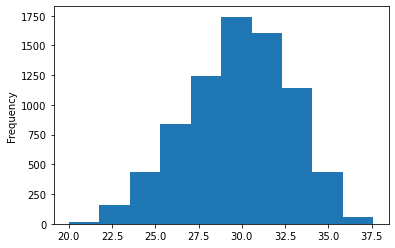

In [14]:
#lets check the distribution of this column
tf.Present_Tmax.plot.hist()
plt.show()

In [15]:
# Above column is normal distributed so lets replace outliers with mean
tf['Present_Tmax'].fillna(tf['Present_Tmax'].mean(),inplace= True)

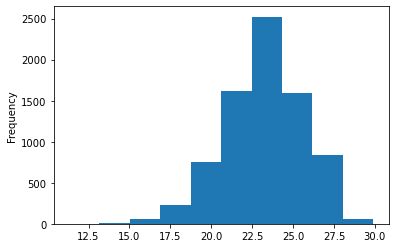

In [16]:
#lets check the distribution of this column
tf.Present_Tmin.plot.hist()
plt.show()

In [17]:
# Above column is not normal distributed so lets replace outliers with median
tf['Present_Tmin'].fillna(tf['Present_Tmin'].median(),inplace= True)

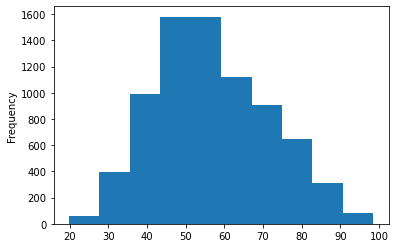

In [18]:
#lets check the distribution of this column
tf.LDAPS_RHmin.plot.hist()
plt.show()

In [19]:
# Above column is normal distributed so lets replace outliers with mean
tf['LDAPS_RHmin'].fillna(tf['LDAPS_RHmin'].mean(),inplace= True)

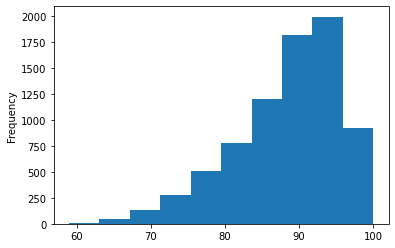

In [20]:
#lets check the distribution of this column
tf.LDAPS_RHmax.plot.hist()
plt.show()

In [21]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_RHmax'].fillna(tf['LDAPS_RHmax'].median(),inplace= True)

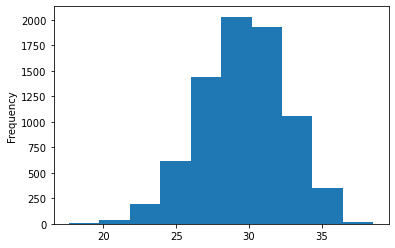

In [22]:
#lets check the distribution of this column
tf.LDAPS_Tmax_lapse.plot.hist()
plt.show()

In [23]:
# Above column is normal distributed so lets replace outliers with mean
tf['LDAPS_Tmax_lapse'].fillna(tf['LDAPS_Tmax_lapse'].mean(),inplace= True)

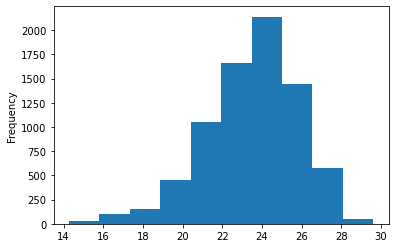

In [24]:
#lets check the distribution of this column
tf.LDAPS_Tmin_lapse.plot.hist()
plt.show()

In [25]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_Tmin_lapse'].fillna(tf['LDAPS_Tmin_lapse'].median(),inplace= True)

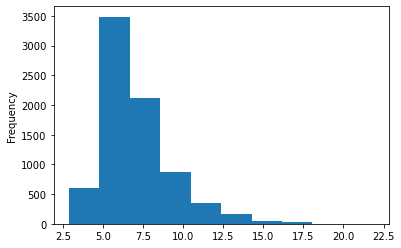

In [26]:
#lets check the distribution of this column
tf.LDAPS_WS.plot.hist()
plt.show()

In [27]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_WS'].fillna(tf['LDAPS_WS'].median(),inplace= True)

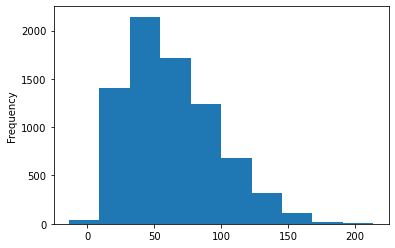

In [28]:
#lets check the distribution of this column
tf.LDAPS_LH.plot.hist()
plt.show()

In [29]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_LH'].fillna(tf['LDAPS_LH'].median(),inplace= True)

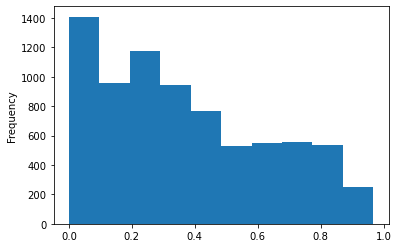

In [30]:
#lets check the distribution of this column
tf.LDAPS_CC1.plot.hist()
plt.show()

In [31]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_CC1'].fillna(tf['LDAPS_CC1'].median(),inplace= True)

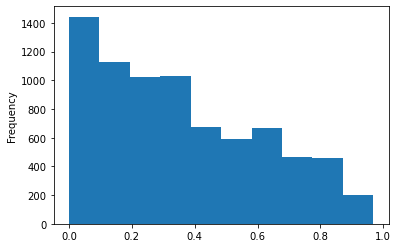

In [32]:
#lets check the distribution of this column
tf.LDAPS_CC2.plot.hist()
plt.show()

In [33]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_CC2'].fillna(tf['LDAPS_CC2'].median(),inplace= True)

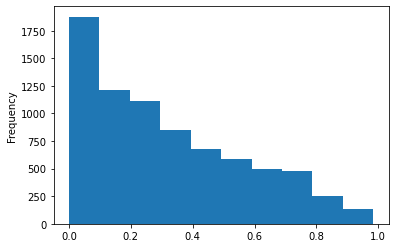

In [34]:
#lets check the distribution of this column
tf.LDAPS_CC3.plot.hist()
plt.show()

In [35]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_CC3'].fillna(tf['LDAPS_CC3'].median(),inplace= True)

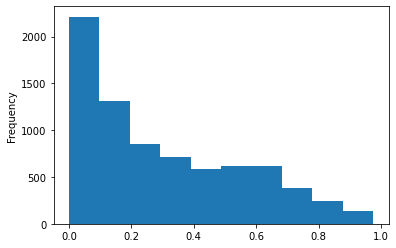

In [36]:
#lets check the distribution of this column
tf.LDAPS_CC4.plot.hist()
plt.show()

In [37]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_CC4'].fillna(tf['LDAPS_CC4'].median(),inplace= True)

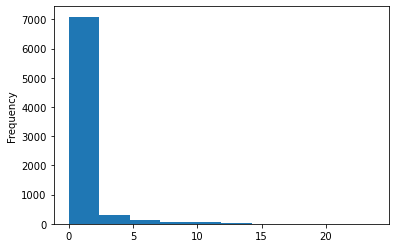

In [38]:
#lets check the distribution of this column
tf.LDAPS_PPT1.plot.hist()
plt.show()

In [39]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_PPT1'].fillna(tf['LDAPS_PPT1'].median(),inplace= True)

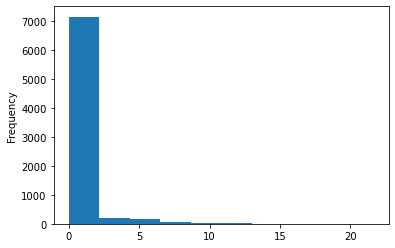

In [40]:
#lets check the distribution of this column
tf.LDAPS_PPT2.plot.hist()
plt.show()

In [41]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_PPT2'].fillna(tf['LDAPS_PPT2'].median(),inplace= True)

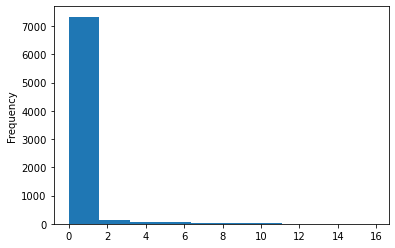

In [42]:
#lets check the distribution of this column
tf.LDAPS_PPT3.plot.hist()
plt.show()

In [43]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_PPT3'].fillna(tf['LDAPS_PPT3'].median(),inplace= True)

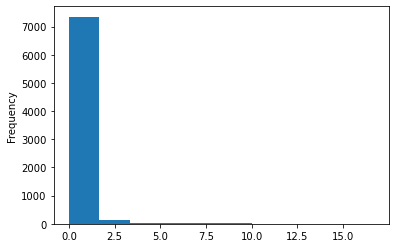

In [44]:
#lets check the distribution of this column
tf.LDAPS_PPT4.plot.hist()
plt.show()

In [45]:
# Above column is not normal distributed so lets replace outliers with median
tf['LDAPS_PPT4'].fillna(tf['LDAPS_PPT4'].median(),inplace= True)

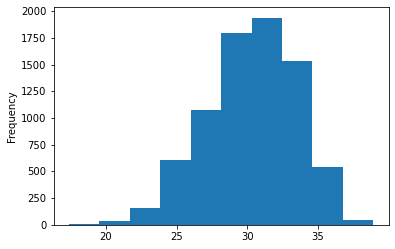

In [46]:
#lets check the distribution of this column
tf.Next_Tmax.plot.hist()
plt.show()

In [47]:
# Above column is normal distributed so lets replace outliers with mean
tf['Next_Tmax'].fillna(tf['Next_Tmax'].mean(),inplace= True)

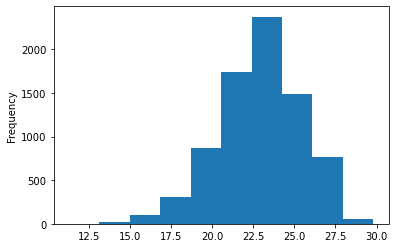

In [48]:
#lets check the distribution of this column
tf.Next_Tmin.plot.hist()
plt.show()

In [49]:
# Above column is  almost normal distributed so lets replace outliers with mean
tf['Next_Tmin'].fillna(tf['Next_Tmin'].mean(),inplace= True)

In [50]:
#lets check for null values now
for i in tf.columns:
    if tf[i].isnull().sum() > 1:
        print(i,tf[i].isnull().sum())

station 2
Date 2


In [51]:
stat_mode = tf['station'].mode()[0]
stat_mode

1.0

In [52]:
#still we have two null values for each of the two columns columns
#station column should be converted to  object datatype, since stattion is not numerical value
#so for station column, we can replace null values with mean or median, it has to replaced with mode
stat_mode = tf['station'].mode()[0]
tf['station'] = tf['station'].replace(np.nan,stat_mode)

In [53]:
tf.station.isnull().sum()

0

In [54]:
#for date column since we have only two rows which is less than 0.01 percent
#if there were many null values in this column, we could have extracted mode of date, month and year
#we can drop the rows with null values
tf.dropna(axis = 0, inplace = True)

In [55]:
#now there are no null values in this dataset
tf.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [56]:
tf.shape

(7750, 25)

# Feature Extraction

In [57]:
#Lets Extract the month from the date column, since the temperature  depends on month 
#lets also extract the year as well 

In [58]:
#Changing Date column from object to int for better prediction

import datetime as dt
tf['Date'] = pd.to_datetime(tf['Date'])
tf['Date'] = tf['Date'].map(dt.datetime.toordinal)
tf.head() #Checking top 5 rows of dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,735049,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,735049,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,735049,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,735049,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,735049,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [59]:
tf.dtypes

station             float64
Date                  int64
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# Data Visualization:

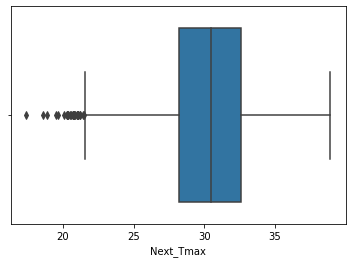

In [60]:
#lets check the box plot of our first target column Next_Tmax, to check if there are outliers
sns.boxplot(tf.Next_Tmax)
plt.show()

we can see there are outliers in our first target column Next_Tmax

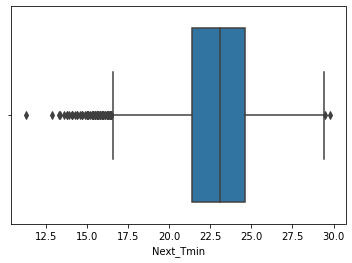

In [61]:
#lets check the box plot of our second target column Next_Tmin, to check if there are outliers
sns.boxplot(tf.Next_Tmin)
plt.show()

we can see there are outliers in our second target column Next_Tmin

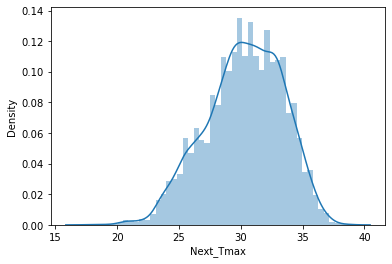

In [62]:
#lets check the distribution of our first target column Next_Tmax
sns.distplot(tf.Next_Tmax)
plt.show()

Our first target column Next_Tmax is almost normal distributed.

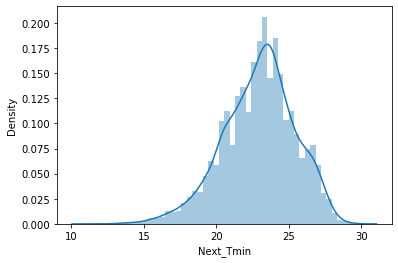

In [63]:
#lets check the distribution of our Second target column Next_Tmin
sns.distplot(tf.Next_Tmin)
plt.show()

Our second target column Next_Tmin is slightly skewed

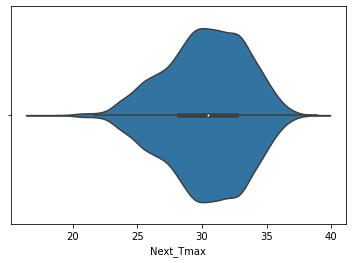

In [64]:
#lets check the violin plot of our First target column Next_Tmax
sns.violinplot(tf.Next_Tmax)
plt.show()

The data is distributed between 29 and 33.

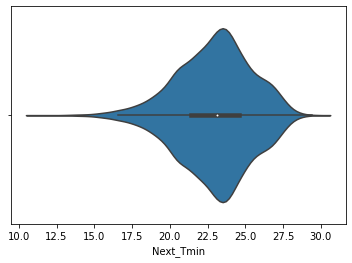

In [65]:
#lets check the violin plot of our Second target column Next_Tmin
sns.violinplot(tf.Next_Tmin)
plt.show()

The data is distributed between 20 and 27.

# Bivariate Analysis with First Target Variable Next_Tmax

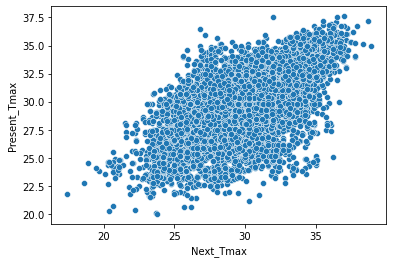

In [66]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['Present_Tmax'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

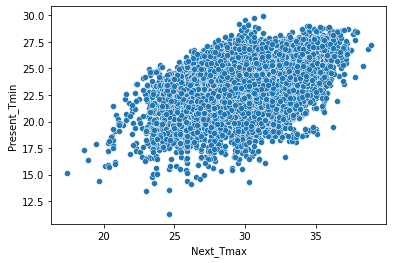

In [67]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['Present_Tmin'] )
plt.show()

we can see from below plot, This column is having positive correlation with our target variable.

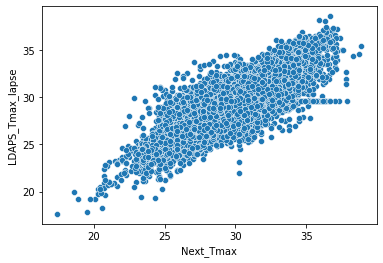

In [68]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['LDAPS_Tmax_lapse'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

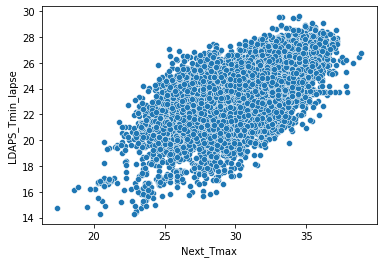

In [69]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['LDAPS_Tmin_lapse'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

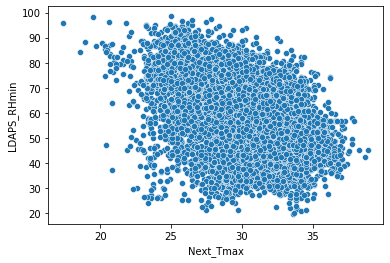

In [70]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['LDAPS_RHmin'] )
plt.show()

we can see from below plot , This column is having slightly negative correlation with our target variable.

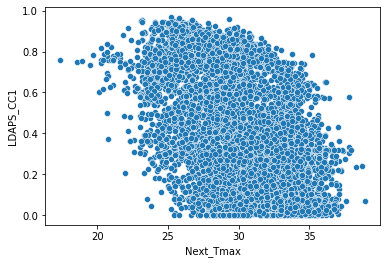

In [71]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['LDAPS_CC1'] )
plt.show()

we can see from below plot , This column is having slightly negative correlation with our target variable.

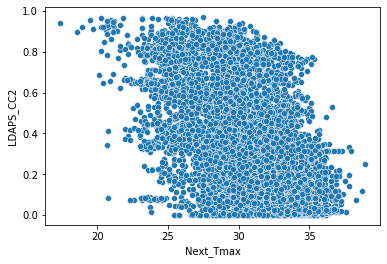

In [72]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['LDAPS_CC2'] )
plt.show()

we can see from below plot , This column is having slightly less negative correlation with our target variable.

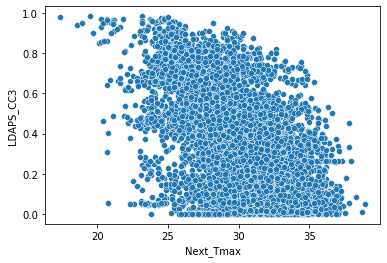

In [73]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['LDAPS_CC3'] )
plt.show()

we can see from below plot , This column is having slightly less negative correlation with our target variable.

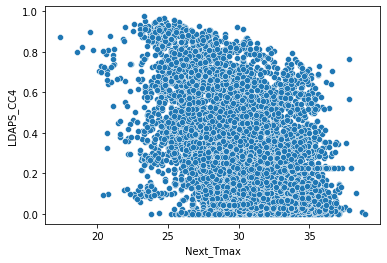

In [74]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmax'] , y =tf['LDAPS_CC4'] )
plt.show()

we can see from below plot , This column is having slightly less negative correlation with our target variable.

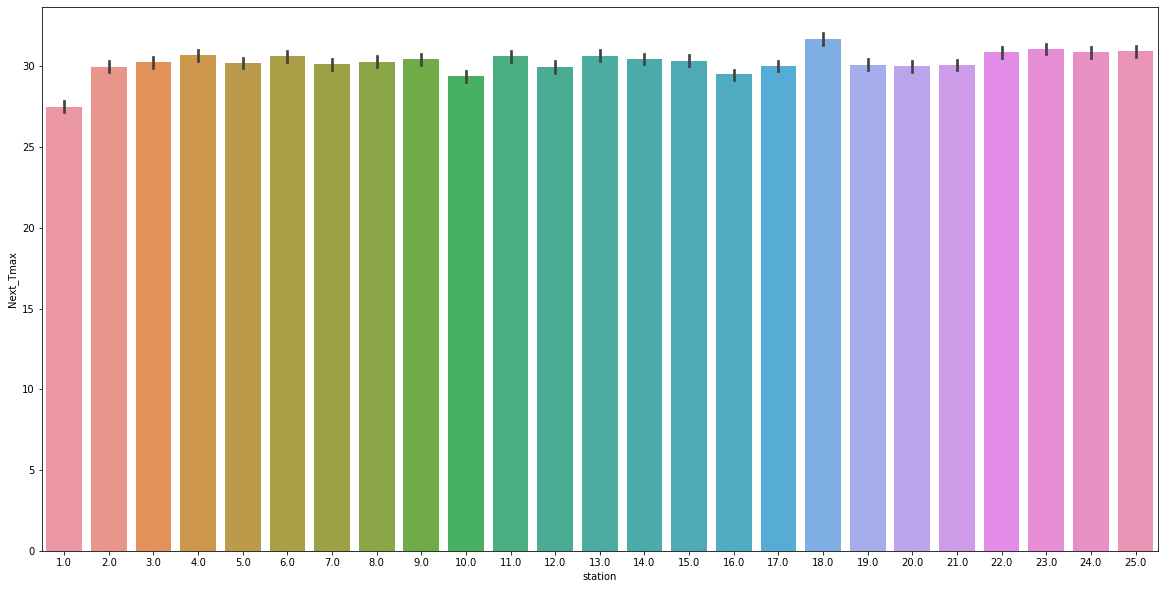

In [75]:
#Lets check this column againt our target variable
plt.figure(figsize= (20,10))
sns.barplot(x = tf['station'] , y =tf['Next_Tmax'] )
plt.show()

we can see that temperature noted in station 18 is quite high compare to other stations.

# Bivariate Analysis with Second Target Variable Next_Tmin

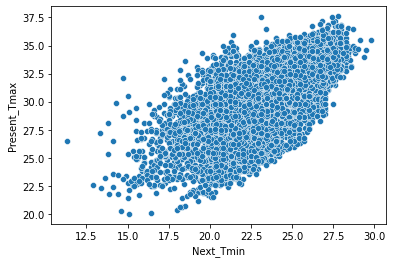

In [76]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['Present_Tmax'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

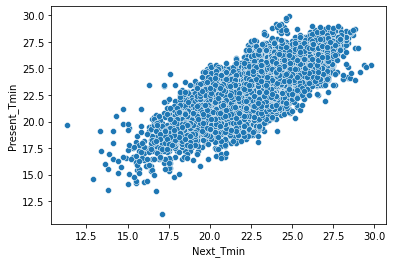

In [77]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['Present_Tmin'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

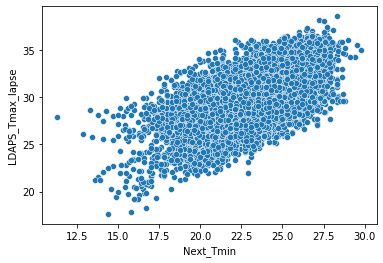

In [78]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['LDAPS_Tmax_lapse'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

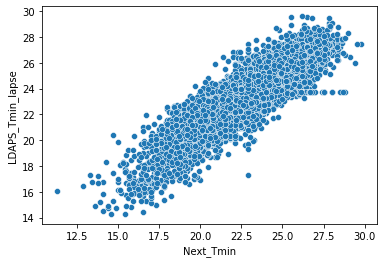

In [79]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['LDAPS_Tmin_lapse'] )
plt.show()

we can see from below plot , This column is having positive correlation with our target variable.

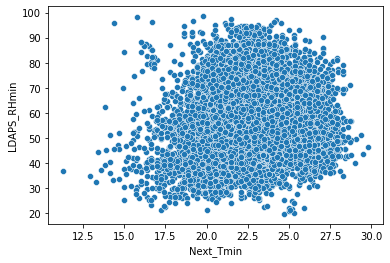

In [80]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['LDAPS_RHmin'] )
plt.show()

we can see from below plot , This column is having slightly positive correlation with our target variable.

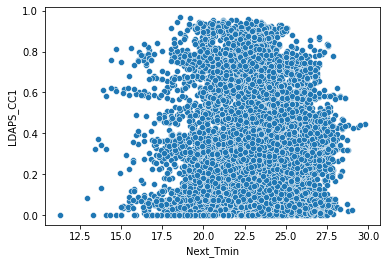

In [81]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['LDAPS_CC1'] )
plt.show()

There is less relation between these columns.

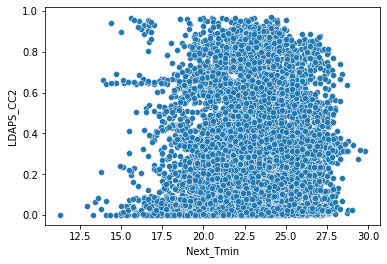

In [82]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['LDAPS_CC2'] )
plt.show()

There is less relation between these columns.

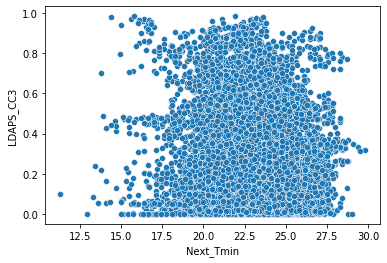

In [83]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['LDAPS_CC3'] )
plt.show()

There is less relation between these columns.

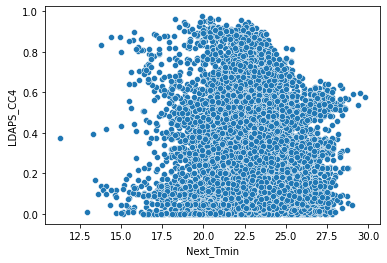

In [84]:
#Lets check this column againt our target variable
sns.scatterplot(x = tf['Next_Tmin'] , y =tf['LDAPS_CC4'] )
plt.show()

There is less relation between these columns.

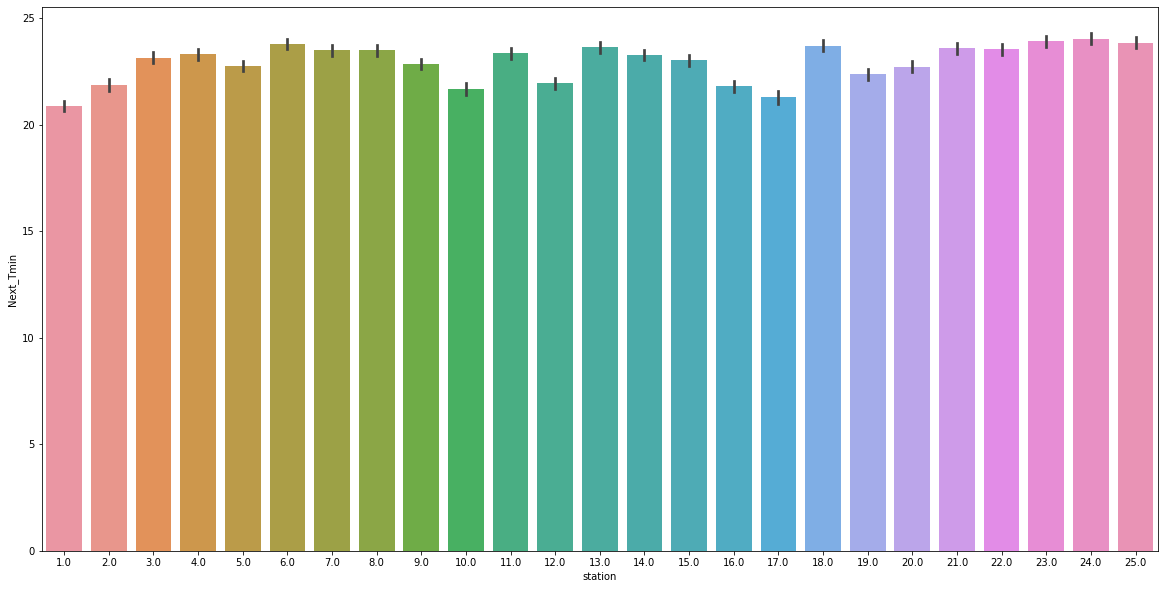

In [85]:
#Lets check this column againt our target variable
plt.figure(figsize= (20,10))
sns.barplot(x = tf['station'] , y =tf['Next_Tmin'] )
plt.show()

Temperature noted in station 1 is quite low compare to other stations.

# Checking Outliers

In [86]:
#lets create a list of numerical columns for outliers removal

Numerical_columns = []
for i in tf.columns:
    if tf[i].dtype != 'object':
        Numerical_columns.append(i)
Numerical_columns

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

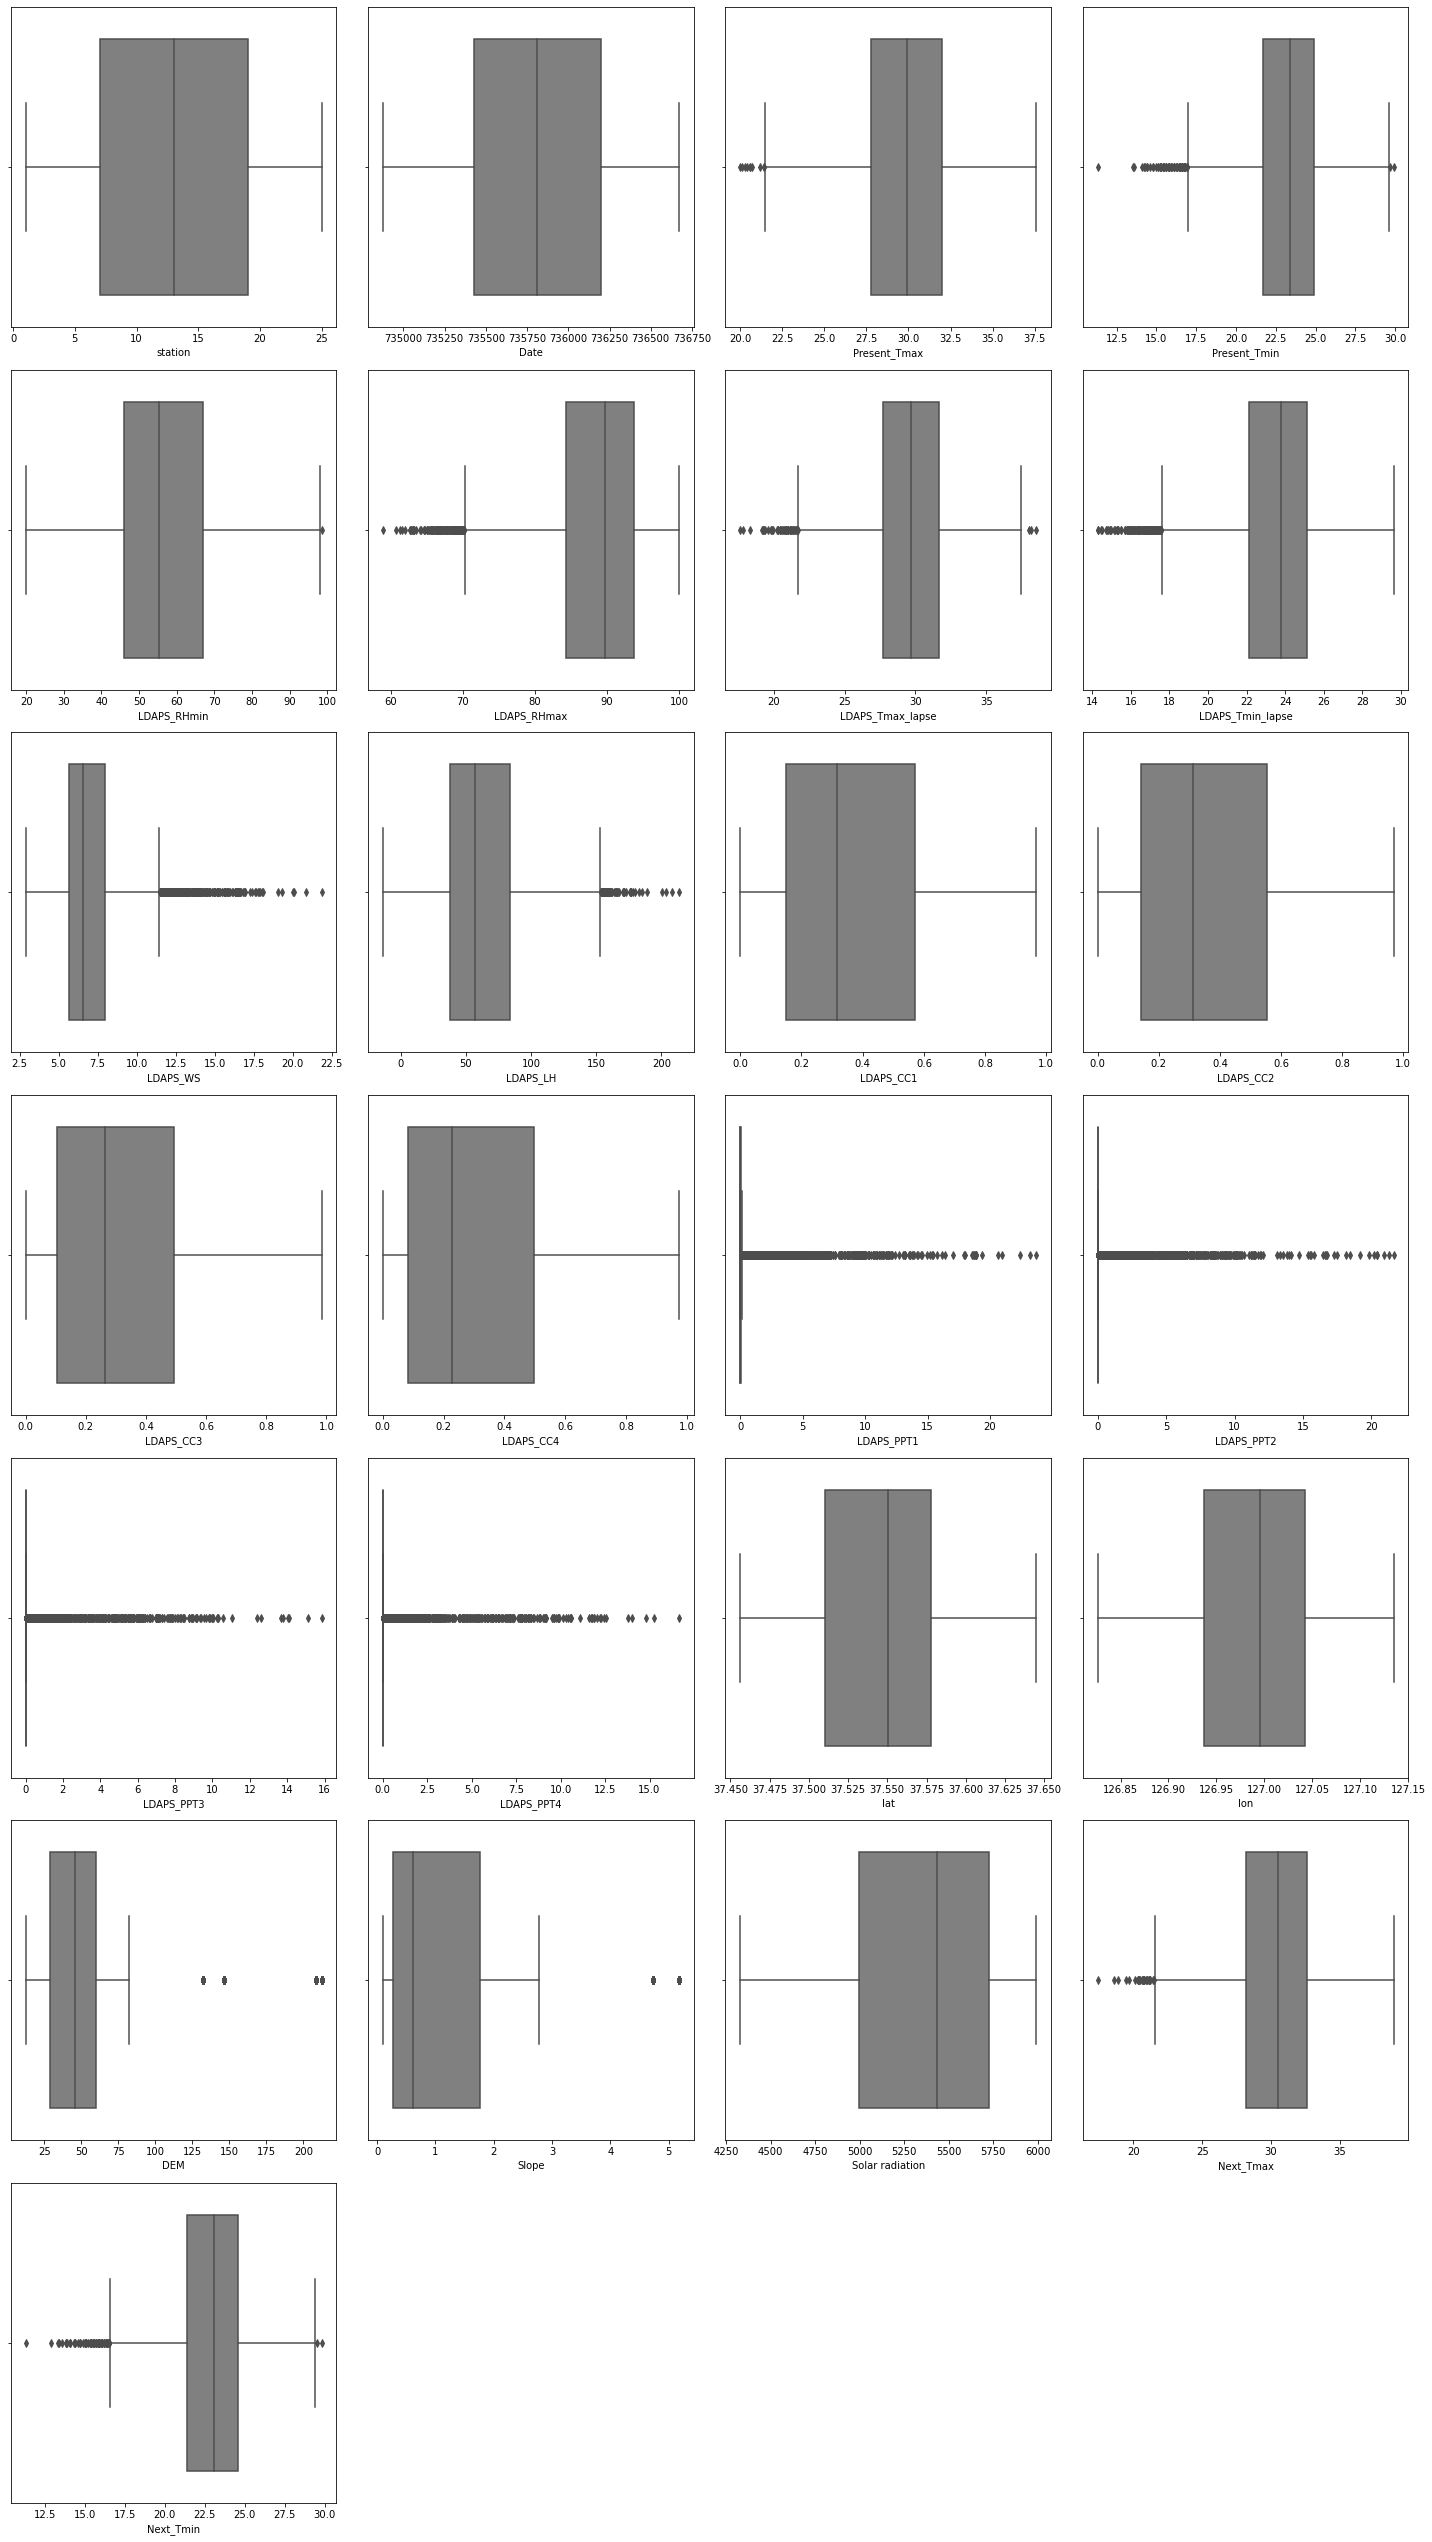

In [87]:
# lets check for outliers among all the columns Numerical columns
collist = Numerical_columns
ncol = 4
nrows =8
plt.figure(figsize= (20,10*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(tf[collist[i]],color='grey',orient = 'v')
    plt.tight_layout()

we can see lot of outliers in most of the columns

# Removing Outliers

In [88]:
#Function of outlier Removal when data is not normal distributed or Right skewed
def outliers_IQR3(data_frame,feature_name):
    IQR  =data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_boundary = data_frame[feature_name].quantile(0.25) - (IQR * 1.5)
    upper_boundary = data_frame[feature_name].quantile(0.75) + (IQR * 1.5)
    tf.loc[tf[feature_name] >= upper_boundary,feature_name]= upper_boundary
    tf.loc[tf[feature_name] <= lower_boundary,feature_name]= lower_boundary

In [89]:
#calling the function
for i in Numerical_columns:
    outliers_IQR3(tf,i)

now the outliers have been removed for all the columns.

# Checking skewness

In [90]:
tf.skew()

station             0.000000
Date               -0.001680
Present_Tmax       -0.255196
Present_Tmin       -0.261009
LDAPS_RHmin         0.300226
LDAPS_RHmax        -0.738462
LDAPS_Tmax_lapse   -0.167690
LDAPS_Tmin_lapse   -0.416531
LDAPS_WS            0.821395
LDAPS_LH            0.602904
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          1.169549
LDAPS_PPT2          1.170217
LDAPS_PPT3          1.175235
LDAPS_PPT4          0.000000
lat                 0.086942
lon                -0.285300
DEM                 0.729986
Slope               1.181369
Solar radiation    -0.511006
Next_Tmax          -0.302475
Next_Tmin          -0.286708
dtype: float64

# Splitting the dataset into X, Y1, Y2

In [91]:
#lets devide X and Y before handing skewness
#Note : we have two target columns in this dataset

Y1 = tf['Next_Tmax'] # Y1 is Next_Tmax

Y2 = tf['Next_Tmin']  #  Y2is Next_Tmin

X = tf.drop(['Next_Tmax','Next_Tmin'],axis = 1)

In [92]:
#lets create a list of numerical columns in X
Numerical_columns_X = []
for i in X.columns:
    if X[i].dtype != 'object':
        Numerical_columns_X.append(i)

In [93]:
#Lets check for skewness in numerical columns
X[Numerical_columns_X].skew()

station             0.000000
Date               -0.001680
Present_Tmax       -0.255196
Present_Tmin       -0.261009
LDAPS_RHmin         0.300226
LDAPS_RHmax        -0.738462
LDAPS_Tmax_lapse   -0.167690
LDAPS_Tmin_lapse   -0.416531
LDAPS_WS            0.821395
LDAPS_LH            0.602904
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.646029
LDAPS_CC4           0.673054
LDAPS_PPT1          1.169549
LDAPS_PPT2          1.170217
LDAPS_PPT3          1.175235
LDAPS_PPT4          0.000000
lat                 0.086942
lon                -0.285300
DEM                 0.729986
Slope               1.181369
Solar radiation    -0.511006
dtype: float64

We can see some columns have skewness.

In [94]:
#Reducing the skewness using power transform method for all the columns whose skewness is out of range -0.5 to +0.5
collist = Numerical_columns_X
for i in range(len(collist)):
    if X[collist[i]].skew() > 0.5:
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr 
    elif X[collist[i]].skew() < -0.5 :
        arr = X[collist[i]].values
        arr = arr.reshape(-1,1)
        arr = power_transform(arr)
        X[collist[i]] = arr    
    else:
        pass
X[Numerical_columns_X].skew()

station             0.000000
Date               -0.001680
Present_Tmax       -0.255196
Present_Tmin       -0.261009
LDAPS_RHmin         0.300226
LDAPS_RHmax        -0.114996
LDAPS_Tmax_lapse   -0.167690
LDAPS_Tmin_lapse   -0.416531
LDAPS_WS            0.017211
LDAPS_LH            0.018820
LDAPS_CC1           0.464742
LDAPS_CC2           0.476659
LDAPS_CC3           0.089606
LDAPS_CC4           0.129753
LDAPS_PPT1          0.989747
LDAPS_PPT2          1.022914
LDAPS_PPT3          1.031726
LDAPS_PPT4          0.000000
lat                 0.086942
lon                -0.285300
DEM                -0.021157
Slope               0.214291
Solar radiation    -0.176686
dtype: float64

skewness have been reduced in all columns.

# Scaling the Data

In [95]:
#Lets scale the data using standard scaler
scal = StandardScaler()
X = pd.DataFrame(scal.fit_transform(X),columns= X.columns)
X.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-1.664101,-1.438031,-0.362538,-0.776536,0.102641,0.274059,-0.532360,-0.232769,0.082450,0.322445,...,-0.580480,-0.656512,-0.637002,-0.628708,0.0,1.189704,-0.005038,1.541097,1.354664,1.850167
1,-1.525426,-1.438031,0.722162,-0.692021,-0.308235,0.186775,0.079109,0.219864,-0.648328,-0.203407,...,-0.599355,-0.656512,-0.637002,-0.628708,0.0,1.189704,0.511327,0.043713,-0.390170,1.401217
2,-1.386750,-1.438031,0.620472,0.026361,-0.553222,-0.779952,0.161920,0.453483,-0.336897,-1.390953,...,-0.515519,-0.656512,-0.637002,-0.628708,0.0,0.653264,0.838778,-0.429814,-0.953463,1.381155
3,-1.248075,-1.438031,0.756059,0.068618,0.101551,1.315491,0.028838,-0.092216,-0.679225,0.215760,...,-0.561044,-0.656512,-0.637002,-0.628708,0.0,1.992377,0.385384,0.078199,1.271372,1.358278
4,-1.109400,-1.438031,0.552678,-0.565247,-0.040088,0.111683,-0.174468,-0.021639,-0.616811,1.311025,...,-0.360578,-0.656512,-0.637002,-0.628708,0.0,0.118811,1.808536,-0.349982,-0.406631,1.367247


In [96]:
X.shape

(7750, 23)

now our data is scaled using standard scaler.

# Model Selection

We have 2 target columns in dataset:

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

# Best random state with Y1 (Next_Tmax)

In [97]:
max_r2score_1 = 0
rand_state_1 = 0
for i in range(1,200):
    x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X,Y1,test_size=0.30,random_state= i )
    lr = LinearRegression()
    lr.fit(x_train_1,y_train_1)
    pred_1 = lr.predict(x_test_1)
    r2_1 = r2_score(y_test_1,pred_1)
    if r2_1 > max_r2score_1:
        max_r2score_1 = r2_1
        rand_state_1 = i
print('Best r2 score is {} on random state {}'.format(max_r2score_1,rand_state_1)) 

Best r2 score is 0.7839520603855358 on random state 145


In [98]:
print('We got our best randoms sate as :',rand_state_1)

We got our best randoms sate as : 145


In [99]:
#Lets split for train and test data
x_train_1,x_test_1,y_train_1,y_test_1 = train_test_split(X,Y1,test_size=0.30,random_state= rand_state_1)

# Model selection for Y1 (Next_Tmax):

In [100]:
#checking each model with Cross val score
models=[LinearRegression(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor()]


l_diff_1 = []

for m in models:
    m.fit(x_train_1,y_train_1)
    pred_1 = m.predict(x_test_1)
    cvs = cross_val_score(m,X,Y1,cv =3)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test_1,pred_1))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test_1,pred_1))
    print('mean squared error : ', mean_squared_error(y_test_1,pred_1))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test_1,pred_1)))
    print('Difference :')
    diff = np.abs(r2_score(y_test_1,pred_1) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(diff))
    l_diff_1.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(diff)))





LinearRegression()
Scores :
r2 score: 0.7839520603855358
Cross Val score : 0.6758401761377836
Error :
mean absolute error : 1.1155547610000522
mean squared error :  2.16568016767782
root mean squared error : 1.4716250091914789
Difference :
Diffrence between cross val score and r2 score is : 0.11


SVR()
Scores :
r2 score: 0.8808519396167866
Cross Val score : 0.7006942371629036
Error :
mean absolute error : 0.801395336445198
mean squared error :  1.1943487720811814
root mean squared error : 1.0928626501446472
Difference :
Diffrence between cross val score and r2 score is : 0.18


DecisionTreeRegressor()
Scores :
r2 score: 0.7881894780879383
Cross Val score : 0.4494026646494449
Error :
mean absolute error : 1.0498492674948674
mean squared error :  2.123203986249586
root mean squared error : 1.457121815858093
Difference :
Diffrence between cross val score and r2 score is : 0.34


KNeighborsRegressor()
Scores :
r2 score: 0.8559649863075518
Cross Val score : 0.578913521743944
Error :
mean

In [101]:
#lets check the least diference between cross val score and r2 score for each model
l_diff_1

[(LinearRegression(),
  'Diffrence between cross val score and r2 score error is : 0.11'),
 (SVR(), 'Diffrence between cross val score and r2 score error is : 0.18'),
 (DecisionTreeRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.34'),
 (KNeighborsRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.28'),
 (RandomForestRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.23'),
 (AdaBoostRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.11'),
 (GradientBoostingRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.16')]

we got AdaBoostRegressor and Linear Regression for Y1(Next_Tmax) with less difference and high R2 score and less errors.

# Best random state with Y2 (Next_Tmin)

In [102]:
max_r2score_2 = 0
rand_state_2 = 0
for j in range(1,200):
    x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(X,Y2,test_size=0.30,random_state= j )
    lr = LinearRegression()
    lr.fit(x_train_2,y_train_2)
    pred_2 = lr.predict(x_test_2)
    r2_2 = r2_score(y_test_2,pred_2)
    if r2_2 > max_r2score_2:
        max_r2score_2 = r2_2
        rand_state_2 = j
print('Best r2 score is {} on random state {}'.format(max_r2score_2,rand_state_2)) 

Best r2 score is 0.8415573288731464 on random state 35


In [103]:
print('We got our best randoms sate as :',rand_state_2)

We got our best randoms sate as : 35


In [104]:
#Lets split for train and test data
x_train_2,x_test_2,y_train_2,y_test_2 = train_test_split(X,Y2,test_size=0.30,random_state= rand_state_2)

# Model Selection for Y2 (Next_Tmin)

In [105]:
#checking each model with Cross val score
models=[LinearRegression(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        AdaBoostRegressor(),
        GradientBoostingRegressor()]

l_diff_2 = []

for m in models:
    m.fit(x_train_2,y_train_2)
    pred_2 = m.predict(x_test_2)
    cvs = cross_val_score(m,X,Y2,cv =3)
    print('\n')
    print(m)
    print('Scores :')
    print('r2 score:',r2_score(y_test_2,pred_2))
    print('Cross Val score :',cvs.mean())
    print('Error :')
    print('mean absolute error :',mean_absolute_error(y_test_2,pred_2))
    print('mean squared error : ', mean_squared_error(y_test_2,pred_2))
    print('root mean squared error :',np.sqrt(mean_squared_error(y_test_2,pred_2)))
    print('Difference :')
    diff = np.abs(r2_score(y_test_2,pred_2) - cvs.mean())
    print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(diff))
    l_diff_2.append((m,'Diffrence between cross val score and r2 score error is : {0:.2f}'.format(diff)))



LinearRegression()
Scores :
r2 score: 0.8415573288731464
Cross Val score : 0.7725809376662781
Error :
mean absolute error : 0.7726053171914595
mean squared error :  0.9645637852406532
root mean squared error : 0.9821220826560481
Difference :
Diffrence between cross val score and r2 score is : 0.07


SVR()
Scores :
r2 score: 0.9143971366148177
Cross Val score : 0.6943701004723936
Error :
mean absolute error : 0.5553589286818335
mean squared error :  0.5211312164015627
root mean squared error : 0.7218941864300908
Difference :
Diffrence between cross val score and r2 score is : 0.22


DecisionTreeRegressor()
Scores :
r2 score: 0.7928589873477748
Cross Val score : 0.5166112514804702
Error :
mean absolute error : 0.8299354838709679
mean squared error :  1.2610284705592119
root mean squared error : 1.1229552397843878
Difference :
Diffrence between cross val score and r2 score is : 0.28


KNeighborsRegressor()
Scores :
r2 score: 0.865474350204327
Cross Val score : 0.5717734777467017
Error :

In [106]:
#lets check the least diference between cross val score and r2 score for each model
l_diff_2

[(LinearRegression(),
  'Diffrence between cross val score and r2 score error is : 0.07'),
 (SVR(), 'Diffrence between cross val score and r2 score error is : 0.22'),
 (DecisionTreeRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.28'),
 (KNeighborsRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.29'),
 (RandomForestRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.15'),
 (AdaBoostRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.10'),
 (GradientBoostingRegressor(),
  'Diffrence between cross val score and r2 score error is : 0.13')]

we got LinearRegression for as best model for Y2(Next_Tmin) with less difference and high R2 score and less errors

# Hyperparmeter Tuning for both the models

**Hyperparamter Tuning for Y1 (Next_Tmax) :**

**AdaBoostRegressor**

In [107]:
#since we choose AdaBoostRegressor for Y1(Next_Tmax), lets perform hyperparameter tuning

In [108]:
#lets create the parameter list to pass in Randomised serach cv
parameters = {'n_estimators' : list(range(50,251,50)), 'loss' : ['linear', 'square', 'exponential']}
#using randomised search CV
ada = RandomizedSearchCV(AdaBoostRegressor() , param_distributions= parameters,cv =3)
ada.fit(x_train_2,y_train_2) 
print(ada.best_score_)
print(ada.best_params_)

0.809950784073585
{'n_estimators': 250, 'loss': 'square'}


**Linear Regression**

In [112]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'fit_intercept' : [True, False], 'normalize' : [True, False],'n_jobs':list(range(50,251,50))}
#using randomised search CV
lr1 = RandomizedSearchCV(LinearRegression() , param_distributions= parameters,cv =3)
lr1.fit(x_train_2,y_train_2) 
print(lr1.best_score_)
print(lr1.best_params_)

0.8213558265193269
{'normalize': False, 'n_jobs': 150, 'fit_intercept': True}


**Hyperparamter Tuning for Y2 (Next_Tmin) : LinearRegression**

In [109]:
#since we choose LinearRegression for Y2(Next_Tmin), lets perform hyperparameter tuning

In [111]:
#lets create the parameter list to pass in Randomised seracgh cv
parameters = {'fit_intercept' : [True, False], 'normalize' : [True, False],'n_jobs':list(range(50,251,50))}
#using randomised search CV
lr = RandomizedSearchCV(LinearRegression() , param_distributions= parameters,cv =3)
lr.fit(x_train_1,y_train_1) 
print(lr.best_score_)
print(lr.best_params_)

0.7494891869537171
{'normalize': True, 'n_jobs': 50, 'fit_intercept': True}


# Creating a Final Model for Y1 and Y2

**Final Model for Y1 (Next_Tmax) : LinearRegressor**

In [113]:
print(lr1.best_params_)

{'normalize': False, 'n_jobs': 150, 'fit_intercept': True}


In [115]:
#since we got Lr as our best model for y1(Next_Tmax)
#This model is not overfitting
#lets create our final model

final_lr1_y1 = LinearRegression(normalize=False, n_jobs= 150, fit_intercept= True)
final_lr1_y1.fit(x_train_1,y_train_1)
final_pred_y1 = final_lr1_y1.predict(x_test_1)
cvs_1 = cross_val_score(final_lr1_y1,X,Y1,cv =3)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test_1,final_pred_y1))
print('Cross Val score :',cvs_1.mean())
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test_1,final_pred_y1))
print('mean squared error : ', mean_squared_error(y_test_1,final_pred_y1))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test_1,final_pred_y1)))
print('\n')
print('Difference :')
diff_1 = np.abs(r2_score(y_test_1,final_pred_y1) - cvs_1.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(diff_1))



Scores :
r2 score: 0.7839520603855358
Cross Val score : 0.6758401761377836


Error :
mean absolute error : 1.1155547610000522
mean squared error :  2.16568016767782
root mean squared error : 1.4716250091914789


Difference :
Diffrence between cross val score and r2 score is : 0.11


we got our final model for Next_Tmax (y1) with 78.39 % accuracy and no overfitting in this model.

**Final Model for Y2 (Next_Tmin) : LinearRegression**

In [116]:
#Lets use our best parameters obtained from hyperparameter tuning
lr1.best_params_

{'normalize': False, 'n_jobs': 150, 'fit_intercept': True}

In [117]:
#since we got linearregression as our best model for y1(Next_Tmax)
#This model is not overfitting
#lets create our final model

final_lr1_y2 = LinearRegression(normalize=False, n_jobs= 150, fit_intercept= True)
final_lr1_y2.fit(x_train_2,y_train_2)
final_pred_y2 = final_lr1_y2.predict(x_test_2)
cvs_2 = cross_val_score(final_lr1_y2,X,Y2,cv =3)
print('\n')
print('Scores :')
print('r2 score:',r2_score(y_test_2,final_pred_y2))
print('Cross Val score :',cvs_2.mean())
print('\n')
print('Error :')
print('mean absolute error :',mean_absolute_error(y_test_2,final_pred_y2))
print('mean squared error : ', mean_squared_error(y_test_2,final_pred_y2))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test_2,final_pred_y2)))
print('\n')
print('Difference :')
diff_2 = np.abs(r2_score(y_test_2,final_pred_y2) - cvs_2.mean())
print('Diffrence between cross val score and r2 score is : {0:.2f}'.format(diff_2))



Scores :
r2 score: 0.8415573288731464
Cross Val score : 0.7725809376662781


Error :
mean absolute error : 0.7726053171914595
mean squared error :  0.9645637852406532
root mean squared error : 0.9821220826560481


Difference :
Diffrence between cross val score and r2 score is : 0.07


we got our final model for Next_Tmin (y2) with 84.15 % accuracy and less overfitting compare to all the models.

# Saving the Y1(Next_Tmax) Model

In [118]:
#serialization using joblib
import joblib

joblib.dump(final_lr1_y1,'Temperature_Max.pkl')

['Temperature_Max.pkl']

In [119]:
Temperature_Max = joblib.load('Temperature_Max.pkl')

In [120]:
#lets predict using our obj file

mtemp_pred = Temperature_Max.predict(x_test_1)

In [121]:
#lets check out the score, to verify

r2_score(y_test_1,mtemp_pred)

0.7839520603855358

# Saving the Y2(Next_Tmin) Model

In [122]:
#serialization using joblib

import joblib

joblib.dump(final_lr1_y2,'Temperature_Min.pkl')

['Temperature_Min.pkl']

In [123]:
Temperature_Min = joblib.load('Temperature_Min.pkl')

In [124]:
#lets predict using our obj file
mtemp_pred = Temperature_Min.predict(x_test_2)

In [125]:
#lets check out the score, to verify
r2_score(y_test_2,mtemp_pred)

0.8415573288731464

**Plotting y_test vs predicted**

# Y1 (Next_Tmax)

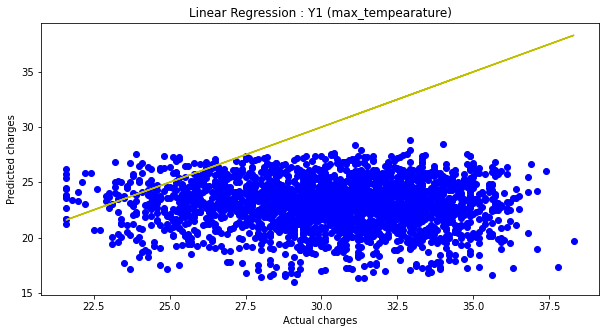

In [127]:
#lets plot y_test vs predicted 

plt.figure(figsize=(10,5))
plt.scatter(x = y_test_1,y = mtemp_pred,color = 'b')
plt.plot(y_test_1,y_test_1,color = 'y')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Linear Regression : Y1 (max_tempearature)')
plt.show()

# Y2 (Next_Tmin)

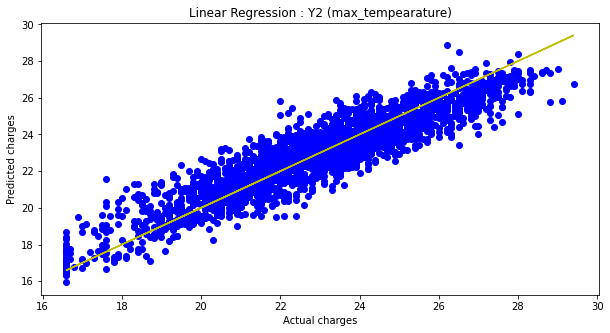

In [129]:
#lets plot y_test vs predicted 

plt.figure(figsize=(10,5))
plt.scatter(x = y_test_2,y = mtemp_pred,color = 'b')
plt.plot(y_test_2,y_test_2,color = 'y')
plt.xlabel('Actual charges')
plt.ylabel('Predicted charges')
plt.title('Linear Regression : Y2 (max_tempearature)')
plt.show()

# Conclusion

**Y1 (Next_Tmax)**

In [130]:
#lets make a dataframe of actual answers vs predicted answers
concl1 = pd.DataFrame((Temperature_Max.predict(x_test_1)[:],y_test_1[:]),index= ['Predicted','Actual'])
concl1

,0,1,2,3,4,5,6,7,8,9,...,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324
Predicted,32.729195,32.577841,32.386591,29.226499,32.115657,24.163958,32.593129,32.169699,27.185018,28.22704,...,29.665221,31.783622,28.798416,36.541663,34.756513,32.475205,29.576833,29.432209,32.374571,31.382059
Actual,34.900000,30.800000,33.200000,30.400000,31.900000,22.900000,33.300000,34.900000,27.400000,29.40000,...,29.600000,32.200000,26.700000,36.400000,32.600000,33.100000,29.000000,31.100000,32.300000,30.800000


we can see that actual and predicted values are very close for maximum temperature

**Y2 (Next_Tmin)**

In [131]:
#lets make a dataframe of actual answers vs predicted answers
concl2 = pd.DataFrame((Temperature_Min.predict(x_test_2)[:],y_test_2[:]),index= ['Predicted','Actual'])
concl2

,0,1,2,3,4,5,6,7,8,9,...,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324
Predicted,21.989173,21.412695,19.934306,25.518884,21.719981,23.291756,22.370138,24.384265,21.154491,20.881834,...,24.841234,22.057833,20.398032,21.168575,22.012767,25.208029,23.283144,20.704183,23.323691,18.150458
Actual,22.100000,21.400000,20.100000,24.900000,23.500000,23.200000,21.700000,24.700000,21.400000,20.200000,...,25.000000,21.200000,21.500000,20.900000,23.500000,24.300000,22.700000,22.000000,24.100000,18.500000


we can see that actual and predicted values are very close for minimum temperature.